In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
faceapp = FaceAnalysis(name='buffalo_sc', root='', providers=['CPUExecutionProvider'])
faceapp.prepare(ctx_id=0, det_size=(640, 640), det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


#### Extract Facial Features and Labels

In [7]:
import re # regular expression

In [8]:
def clean_name(string):
  string = re.sub(r'[^A-Za-z]', ' ', string)
  string = string.title()
  return string

In [14]:
person_info = []
listdir = os.listdir('../data/images')
for folder_name in listdir:
  role, name = folder_name.split('-')
  name = clean_name(name)

  # path of each image in respective folder
  img_files = os.listdir(path=f'../data/images/{folder_name}')
  for file in img_files:
    path = f'../data/images/{folder_name}/{file}'
    # step-1: read the image
    img_arr = cv2.imread(path)

    # step-2: get the info
    result = faceapp.get(img_arr, max_num=1)
    if len(result) > 0: 
      # step-3: extract facial embdding
      res = result[0]
      embedding = res['embedding']

      # step-4: save all info name, role, embedding in a list
      person_info.append([name, role, embedding])

In [17]:
dataframe = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])
dataframe # store in redis

,Name,Role,Facial_Features
0,Angelina Jolie,student,"[-0.8410335, 1.6623635, -0.745449, -2.138221, ..."
1,Angelina Jolie,student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,student,"[1.6630238, 1.161926, -0.4108489, -2.6416948, ..."
4,Angelina Jolie,student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."
5,Angelina Jolie,student,"[0.40983105, 1.1813736, -0.9961994, -1.4018284..."
6,Angelina Jolie,student,"[0.42182076, 2.0830736, 1.0647428, -2.273447, ..."
7,Angelina Jolie,student,"[0.3949412, 0.84420955, -0.615458, -2.105093, ..."
8,Angelina Jolie,student,"[1.0928565, 1.1707087, -0.2880756, -2.0103226,..."
9,Angelina Jolie,student,"[-0.63545597, 1.7897248, 0.5982856, -3.550097,..."


#### Inference

In [24]:
# read test image
img_test = cv2.imread('../data/test_images/test_2.jpg')
cv2.imshow('test image', img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
res_test = faceapp.get(img_test, max_num=0)
for rt in res_test:
  bbox = rt['bbox'].astype(int)
  score = int(rt['det_score'] * 100)
  embed_test = rt['embedding']

In [31]:
embed_test

array([-0.81460756, -1.1385202 , -0.97908545, -1.150692  ,  1.5846984 ,
        0.9396069 , -1.0755138 ,  1.176386  ,  1.3322903 ,  1.6345241 ,
       -2.123665  ,  1.736643  ,  0.0117197 ,  0.30058706,  0.14717166,
       -0.20748596,  0.13353142, -0.30676863,  0.4830975 ,  1.0171186 ,
       -0.6403645 , -1.0577049 ,  2.0495815 ,  0.66228634,  0.7519514 ,
       -1.3411472 ,  1.1999533 , -0.8141085 , -1.1954961 ,  1.3338745 ,
        1.5121737 ,  0.16682452,  0.82251805,  0.3177985 ,  0.077865  ,
       -0.04889482,  0.10414684,  0.5998464 ,  0.60888517,  0.13250083,
       -1.8985647 ,  1.4158247 ,  0.6816062 , -0.26070988,  0.25268805,
       -0.8731782 ,  0.11782408,  1.2077979 ,  0.4981435 , -0.7124546 ,
       -1.6257958 ,  0.6434072 , -1.2487804 , -1.9654117 , -0.47745597,
       -0.38855305,  2.2300937 ,  0.17762458, -0.2597168 , -0.83510786,
       -0.57950866, -0.4991109 ,  0.63522387,  0.3260302 , -1.0649614 ,
        0.8708705 ,  0.03718778,  0.569747  ,  1.6455808 ,  0.11

In [28]:
X_list = dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [20]:
X.shape

(50, 512)

In [21]:
from sklearn.metrics import pairwise

In [32]:
y = embed_test.reshape(1, 512) # 1 * 512

euclidean_distance = pairwise.euclidean_distances(X, y)
manhattan_distance = pairwise.manhattan_distances(X, y)
cosine_similar = pairwise.cosine_similarity(X, y)

In [33]:
data_search = dataframe.copy()
data_search['euclidean'] = euclidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar


In [37]:
data_search.head(2)

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Angelina Jolie,student,"[-0.8410335, 1.6623635, -0.745449, -2.138221, ...",30.852697,551.656335,-0.026161
1,Angelina Jolie,student,"[0.09012404, -0.4169108, -0.37650695, 0.424011...",30.549221,552.796066,0.014130


In [35]:
import matplotlib.pyplot as plt

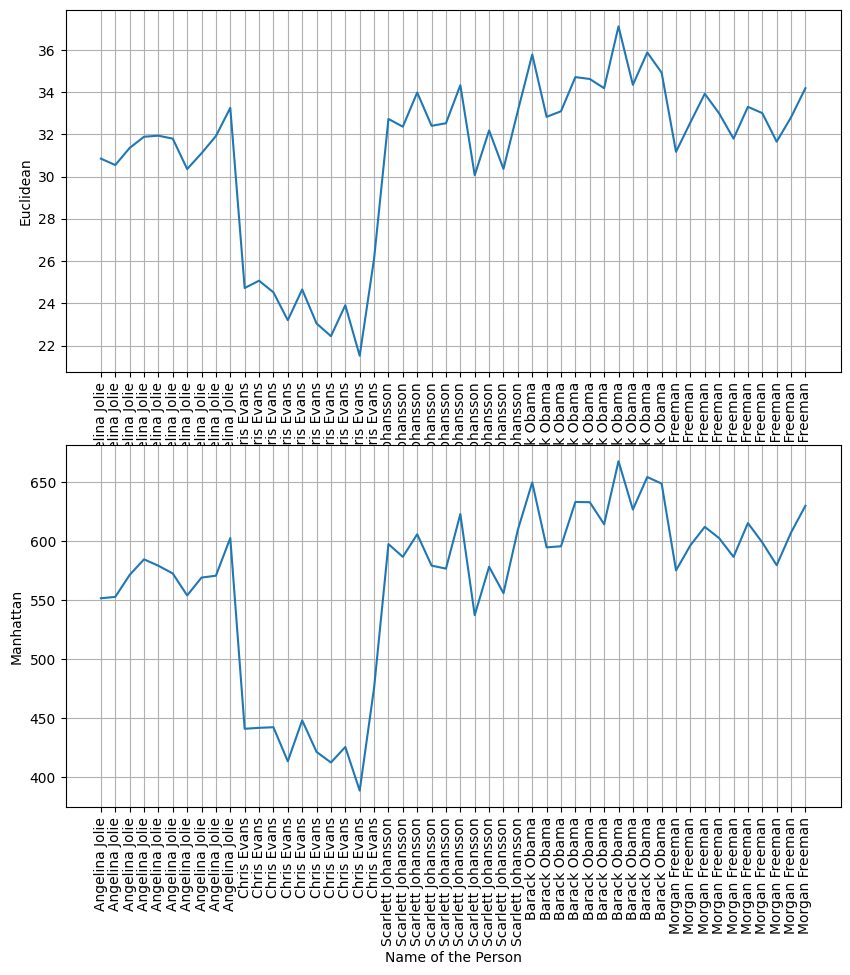

In [47]:
plt.figure(figsize=(10,16))
plt.subplot(3, 1, 1)
plt.plot(data_search['euclidean'])
plt.xticks(ticks=list(range(len(data_search['euclidean']))), labels=data_search['Name'], rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Euclidean')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['manhattan']))), labels=data_search['Name'], rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Manhattan')
plt.grid()

plt.show()

#### Identify the Person using Euclidean distance

In [48]:
d_eq_optimal = 25

In [56]:
datafilter = data_search.query(f'euclidean < {d_eq_optimal}')
datafilter.reset_index(drop=True, inplace=True)

if len(datafilter) > 0:
  argmin = datafilter['euclidean'].argmin()
  name, role = datafilter.loc[argmin][['Name', 'Role']]
else:
  name = 'Unknown'
  role = 'Unknown'

In [57]:
name, role

('Chris Evans', 'student')

#### Identify the Person using Manhattan Distance

In [60]:
d_man_optimal = 450

In [61]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True, inplace=True)

if len(datafilter) > 0:
  argmin = datafilter['manhattan'].argmin()
  name_man, role_man = datafilter.loc[argmin][['Name', 'Role']]
else:
  name_man = 'Unknown'
  role_man = 'Unknown'

In [62]:
name_man, role_man

('Chris Evans', 'student')

#### Identify the Person using Cosine Similarity

In [63]:
S_opt = 0.5

In [64]:
datafilter = data_search.query(f'cosine < {S_opt}')
datafilter.reset_index(drop=True, inplace=True)

if len(datafilter) > 0:
  argmax = datafilter['cosine'].argmax()
  name_cos, role_cos = datafilter.loc[argmax][['Name', 'Role']]
else:
  name_cos = 'Unknown'
  role_cos = 'Unknown'

In [65]:
name_man, role_man

('Chris Evans', 'student')

#### Identify Multiple Person in an Image

In [66]:
def ml_search_algorithm(dataframe, feature_column, test_vector, name_role=['Name', 'Role'], thresh = 0.5):
  """
  cosine similarity base search algorithm
  """
  # Step-1: take the dataframe (collection of data)
  dataframe = dataframe.copy()

  # Step-2: Index face embedding from the dataframe and covert into array
  X_list = dataframe[feature_column].tolist()
  x = np.asarray(X_list)

  # Step-3: Cal. consine similarity
  similar = pairwise.cosine_similarity(x, test_vector.reshape(1, -1))
  similar_arr = np.array(similar).flatten()
  dataframe['cosine'] = similar_arr

  # Step-4: filter the data
  data_filter = dataframe.query(f'cosine >= {thresh}')
  if len(data_filter) > 0:
    # Step-5: get the persone name
    data_filter.reset_index(drop=True, inplace=True)
    argmax = data_filter['cosine'].argmax()
    person_name, person_role = data_filter.loc[argmax][name_role]
  else:
    person_name = 'Unknown'
    person_role = 'Unknown'

  return person_name, person_role
  

In [68]:
test_image = cv2.imread('../data/test_images/test_11.jpg')
cv2.imshow('test image', test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
# take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()

# use for loop and extract each embedding and pass to ml_search_algorithm
for res in results:
  x1, y1, x2, y2 = res['bbox'].astype(int)
  embeddings = res['embedding']
  person_name, person_role = ml_search_algorithm(dataframe, 'Facial_Features', test_vector=embeddings, name_role=['Name', 'Role'], thresh=0.5)
  
  if person_name == 'Unknown':
    color = (0, 0, 255)
  else:
    color = (0, 255, 0)
  cv2.rectangle(test_copy, (x1, y1), (x2, y2), color)
  text_gen = person_name
  cv2.putText(test_copy, text_gen, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 2)

cv2.imshow('test image', test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

#### Compressing dataset

In [77]:
dataframe_compress = dataframe.groupby(by=['Name', 'Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Angelina Jolie,student,"[0.4324317, 1.074975, -0.12851736, -1.833421, ..."
1,Barack Obama,teacher,"[0.94846946, -0.5583677, 0.09491567, -1.279613..."
2,Chris Evans,student,"[0.72002447, -1.4682528, -0.77743137, -1.45999..."
3,Morgan Freeman,teacher,"[0.48562637, -0.61965686, -0.4072629, 1.068597..."
4,Scarlett Johansson,student,"[0.1912692, -0.48850536, -1.6902622, 0.4422732..."


#### Convert dataframe into array and save in numpy zip format

In [79]:
xvalues = dataframe_compress.values

In [80]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [81]:
# Optional
np.savez('dataframe_students_teacher.npz', xvalues, col_name)